#### Import packages

>  Import all the packages that will be used in this analysis.

In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import data

> a) Load the dataset in Jupyter Notebook.

In [750]:
#Load the data
data = pd.read_csv('patients.csv')

> b) Using head(), examine the data. Explain your findings. Did you notice anything
abnormal or interesting?

In [751]:
#Overview of the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


>From the preceeding table, we note that the data has 9 variables. One interesting observation noted is that in the insulin and SkinThickness attributes, there observations whose entries are zero. Ideally, it would not be possible to have a skinthickness of zero making these observations interesting in this case.

> c) Calculate the mean, median, standard deviation, and quartiles for each independent variable. Explain your results. 

In [752]:
#Exclude the target attribute
data1 = data.drop('Diagnosis', axis = 1)
#Compute the mean of the attributes
menn = data1.mean()
#Compute the standard deviation
stdd = data1.std()
#Compute the 25th and 75th quartiles
quart = data1.quantile([0.25,0.75]).T
#Compute the median
med = data1.median()
#Store the results in a single dataframe
#Add mean to dataframe
quart['Mean'] = menn
#Add Median
quart['Median'] = med
#Standard deviation
quart['Standard Deviation'] = stdd
quart

,0.25,0.75,Mean,Median,Standard Deviation
Pregnancies,1.00000,6.00000,3.845052,3.0000,3.369578
Glucose,99.00000,140.25000,120.894531,117.0000,31.972618
BloodPressure,62.00000,80.00000,69.105469,72.0000,19.355807
SkinThickness,0.00000,32.00000,20.536458,23.0000,15.952218
Insulin,0.00000,127.25000,79.799479,30.5000,115.244002
BMI,27.30000,36.60000,31.992578,32.0000,7.884160
Pedigree,0.24375,0.62625,0.471876,0.3725,0.331329
Age,24.00000,41.00000,33.240885,29.0000,11.760232


> It is observed from the preceding table that most of the individuals were aged 33 years with an average of 4 pregnacies.

> d) Find missing values for each independent variable and fill them with median values. The missing values for independent variables in the dataset are coded 0.

In [753]:
#replace zeros with nan to allow easy examination of missing observations
data2 = data1.replace(0,np.nan)

In [754]:
cnt = data2.isna().sum()
cnt = pd.DataFrame(cnt)
cnt = cnt.reset_index()
cnt.columns = ['Variable','Count of missing']
cnt

,Variable,Count of missing
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,Pedigree,0
7,Age,0


In [755]:
#Fill missing observations with median
data_f = data2.fillna(data2.median())

In [756]:
#Count number of missing observations in the new dataframe
cnt = data_f.isna().sum()
cnt = pd.DataFrame(cnt)
cnt = cnt.reset_index()
cnt.columns = ['Variable','Count of missing']
cnt

,Variable,Count of missing
0,Pregnancies,0
1,Glucose,0
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0
6,Pedigree,0
7,Age,0


> e) Find outliers for each independent variable using the IQR rule. 

In [757]:
#Define a function to detect outliers of a given column using the IQR approach
def outlier_det(dataset):
    outliers=[]
    #Finding first quartile and third quartile of the given variable
    q1, q3= np.percentile(dataset,[25,75])
    #Find the IQR which is the difference between third and first quartile
    iqr = q3 - q1
    #Find lower and upper bound
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    #Find values that lie beyond the bounds
    for y in dataset:
        if y < lower_bound:
            outliers.append(y)
        elif y > upper_bound:
            outliers.append(y)
        else:
            pass
    #Fill values that are less than the lower and upper bounds with median
    print('Top 20 Outliers for',dataset.name)
    return outliers

In [758]:
data_f[data_f.columns[0]].name

'Pregnancies'

In [759]:
outlier_datapoints = outlier_det(data_f[data_f.columns[0]])
outlier_datapoints[0:20]

Top 20 Outliers for Pregnancies


[13.0,
 13.0,
 13.0,
 15.0,
 17.0,
 13.0,
 14.0,
 13.0,
 13.0,
 14.0,
 13.0,
 13.0,
 13.0,
 13.0]

In [760]:
outlier_datapoints = outlier_det(data_f[data_f.columns[1]])
outlier_datapoints[0:20]

Top 20 Outliers for Glucose


[]

In [761]:
outlier_datapoints = outlier_det(data_f[data_f.columns[3]])
outlier_datapoints[0:20]

Top 20 Outliers for SkinThickness


[45.0,
 47.0,
 11.0,
 47.0,
 11.0,
 10.0,
 60.0,
 13.0,
 13.0,
 54.0,
 51.0,
 56.0,
 14.0,
 13.0,
 50.0,
 44.0,
 12.0,
 46.0,
 44.0,
 13.0]

In [762]:
outlier_datapoints = outlier_det(data_f[data_f.columns[4]])
outlier_datapoints[0:20]

Top 20 Outliers for Insulin


[94.0,
 168.0,
 88.0,
 543.0,
 846.0,
 175.0,
 230.0,
 83.0,
 96.0,
 235.0,
 146.0,
 140.0,
 110.0,
 245.0,
 54.0,
 192.0,
 207.0,
 70.0,
 240.0,
 82.0]

In [763]:
outlier_datapoints = outlier_det(data_f[data_f.columns[5]])
outlier_datapoints[0:20]

Top 20 Outliers for BMI


[53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]

In [764]:
outlier_datapoints = outlier_det(data_f[data_f.columns[6]])
outlier_datapoints[0:20]

Top 20 Outliers for Pedigree


[2.288,
 1.441,
 1.39,
 1.893,
 1.781,
 1.222,
 1.4,
 1.321,
 1.224,
 2.329,
 1.318,
 1.213,
 1.353,
 1.224,
 1.391,
 1.476,
 2.137,
 1.731,
 1.268,
 1.6]

In [765]:
outlier_datapoints = outlier_det(data_f[data_f.columns[7]])
outlier_datapoints[0:20]

Top 20 Outliers for Age


[69, 67, 72, 81, 67, 67, 70, 68, 69]

> Replace outliers with median values.

In [766]:
q1, q3= np.percentile(data_f[data_f.columns[7]],[25,75])
#Find the IQR which is the difference between third and first quartile
iqr = q3 - q1
#Find lower and upper bound
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
#Replace values below and above the lower and upper bounds respectively with the median of the corresponding variable
data1 = data_f.replace(data_f[data_f.columns[7]]<lower_bound, data_f[data_f.columns[7]].median())

In [767]:
data_f.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [768]:
#Define a function to detect outliers of a given column using the IQR approach
def outlier_det(variable):
    sorted(variable)
    #Finding first quartile and third quartile of the given variable
    Q1, Q3 = np.percentile(variable , [25,75])
    #Find the IQR which is the difference between third and first quartile
    IQR = Q3 - Q1
    #Find lower and upper bound
    lower_bound = Q1 - (1.5 * IQR) #Use (3* IQR for extreme outliers)
    upper_bound = Q3 + (1.5 * IQR) #Use (3* IQR for extreme outliers)
    print("Outliers for", variable.name)
    return lower_bound,upper_bound

In [786]:
l,u = outlier_det(data_f[data_f.columns[0]])
data_f[data_f.columns[0]][ (data_f[data_f.columns[0]] > u) | (data_f[data_f.columns[0]] < l) ].unique()

Outliers for Pregnancies


array([13., 15., 17., 14.])

In [789]:
l,u = outlier_det(data_f[data_f.columns[1]])
list(data_f[data_f.columns[1]][ (data_f[data_f.columns[1]] > u) | (data_f[data_f.columns[1]] < l) ].unique())

Outliers for Glucose


[]

In [790]:
l,u = outlier_det(data_f[data_f.columns[2]])
list(data_f[data_f.columns[2]][ (data_f[data_f.columns[2]] > u) | (data_f[data_f.columns[2]] < l) ].unique())

Outliers for BloodPressure


[30.0, 110.0, 108.0, 122.0, 24.0, 38.0, 106.0, 114.0]

In [791]:
l,u = outlier_det(data_f[data_f.columns[3]])
list(data_f[data_f.columns[3]][ (data_f[data_f.columns[3]] > u) | (data_f[data_f.columns[3]] < l) ].unique())

Outliers for SkinThickness


[45.0,
 47.0,
 11.0,
 10.0,
 60.0,
 13.0,
 54.0,
 51.0,
 56.0,
 14.0,
 50.0,
 44.0,
 12.0,
 46.0,
 7.0,
 52.0,
 43.0,
 48.0,
 8.0,
 49.0,
 63.0,
 99.0]

In [795]:
l,u = outlier_det(data_f[data_f.columns[4]])
data_f[data_f.columns[4]][ (data_f[data_f.columns[4]] > u) | (data_f[data_f.columns[4]] < l) ].unique()

Outliers for Insulin


array([ 94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235., 146.,
       140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,  36.,  23.,
       300., 342., 304., 142.,  38., 100.,  90., 270.,  71., 176.,  48.,
        64., 228.,  76., 220.,  40., 152.,  18., 495.,  37.,  51.,  99.,
       145., 225.,  49.,  50.,  92., 325.,  63., 284., 204., 155., 485.,
        53., 105., 285., 156.,  78.,  55.,  58., 160., 210., 318.,  44.,
       190., 280.,  87., 271., 478.,  56.,  32., 744., 370.,  45., 194.,
       680., 402., 258., 375., 150.,  67.,  57., 278., 545.,  75.,  74.,
       182., 360., 215., 184.,  42., 148., 180., 205.,  85., 231.,  29.,
        68.,  52., 255., 171.,  73., 108.,  43., 167., 249., 293.,  66.,
       465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415., 275., 165.,
       579., 310.,  61., 474., 170., 277.,  60.,  14.,  95., 237., 191.,
       328., 250., 480., 265., 193.,  79.,  86., 326., 188., 106.,  65.,
       166., 274.,  77., 330., 600., 185.,  25.,  4

In [796]:
l,u = outlier_det(data_f[data_f.columns[5]])
list(data_f[data_f.columns[5]][ (data_f[data_f.columns[5]] > u) | (data_f[data_f.columns[5]] < l)].unique())

Outliers for BMI


[53.2, 55.0, 67.1, 52.3, 52.9, 59.4, 57.3]

In [797]:
l,u = outlier_det(data_f[data_f.columns[6]])
list(data_f[data_f.columns[6]][ (data_f[data_f.columns[6]] > u) | (data_f[data_f.columns[6]] < l) ].unique())

Outliers for Pedigree


[2.288,
 1.441,
 1.39,
 1.893,
 1.781,
 1.222,
 1.4,
 1.321,
 1.224,
 2.329,
 1.318,
 1.213,
 1.353,
 1.391,
 1.476,
 2.137,
 1.731,
 1.268,
 1.6,
 2.42,
 1.251,
 1.699,
 1.258,
 1.282,
 1.698,
 1.461,
 1.292,
 1.394]

In [798]:
l,u = outlier_det(data_f[data_f.columns[7]])
list(data_f[data_f.columns[7]][ (data_f[data_f.columns[7]] > u) | (data_f[data_f.columns[7]] < l) ].unique())

Outliers for Age


[69, 67, 72, 81, 70, 68]

> Replace the outliers with median

##### Pregnancies

In [778]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[0]])
data_f[data_f.columns[0]][ (data_f[data_f.columns[0]] > u) | (data_f[data_f.columns[0]] < l) ]
#Get copy of the independent variables
df = data_f.copy()
#Compute median
median = df['Pregnancies'].median()
#Replace values greater than the upper limit with nan
df.loc[df.Pregnancies > u, 'Pregnancies'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.Pregnancies <l, 'Pregnancies'] = np.nan
df.fillna(median,inplace=True)

Outliers for Pregnancies


##### Glucose

In [779]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[1]])
data_f[data_f.columns[1]][ (data_f[data_f.columns[1]] > u) | (data_f[data_f.columns[1]] < l) ]
#Compute median
median = df['Glucose'].median()
#Replace values greater than the upper limit with nan
df.loc[df.Glucose > u, 'Glucose'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.Glucose <l, 'Glucose'] = np.nan
df.fillna(median,inplace=True)

Outliers for Glucose


##### BloodPressure

In [780]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[2]])
data_f[data_f.columns[2]][ (data_f[data_f.columns[2]] > u) | (data_f[data_f.columns[2]] < l) ]
#Compute median
median = df['BloodPressure'].median()
#Replace values greater than the upper limit with nan
df.loc[df.BloodPressure > u, 'BloodPressure'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.BloodPressure <l, 'BloodPressure'] = np.nan
df.fillna(median,inplace=True)

Outliers for BloodPressure


##### SkinThickness

In [781]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[3]])
data_f[data_f.columns[3]][ (data_f[data_f.columns[3]] > u) | (data_f[data_f.columns[3]] < l) ]
#Compute median
median = df['SkinThickness'].median()
#Replace values greater than the upper limit with nan
df.loc[df.SkinThickness > u, 'SkinThickness'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.SkinThickness <l, 'SkinThickness'] = np.nan
df.fillna(median,inplace=True)

Outliers for SkinThickness


##### Insulin

In [782]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[4]])
data_f[data_f.columns[4]][ (data_f[data_f.columns[4]] > u) | (data_f[data_f.columns[4]] < l) ]
#Compute median
median = df['Insulin'].median()
#Replace values greater than the upper limit with nan
df.loc[df.Insulin > u, 'Insulin'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.Insulin <l, 'Insulin'] = np.nan
df.fillna(median,inplace=True)

Outliers for Insulin


##### BMI

In [783]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[5]])
data_f[data_f.columns[5]][ (data_f[data_f.columns[5]] > u) | (data_f[data_f.columns[5]] < l) ]
#Compute median
median = df['BMI'].median()
#Replace values greater than the upper limit with nan
df.loc[df.BMI > u, 'BMI'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.BMI <l, 'BMI'] = np.nan
df.fillna(median,inplace=True)

Outliers for BMI


##### Pedigree

In [784]:
#Get upper and lower bound
l,u = outlier_det(data_f[data_f.columns[6]])
data_f[data_f.columns[6]][ (data_f[data_f.columns[6]] > u) | (data_f[data_f.columns[6]] < l) ]
#Compute median
median = df['Pedigree'].median()
#Replace values greater than the upper limit with nan
df.loc[df.Pedigree > u, 'Pedigree'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.Pedigree <l, 'Pedigree'] = np.nan
df.fillna(median,inplace=True)

Outliers for Pedigree


##### Age

In [785]:

l,u = outlier_det(data_f[data_f.columns[7]])
data_f[data_f.columns[7]][ (data_f[data_f.columns[7]] > u) | (data_f[data_f.columns[7]] < l) ]
#Compute median
median = df['Age'].median()
#Replace values greater than the upper limit with nan
df.loc[df.Age > u, 'Age'] = np.nan
#Replace values less than the lower limit with nan
df.loc[df.Age <l, 'Age'] = np.nan
df.fillna(median,inplace=True)

Outliers for Age


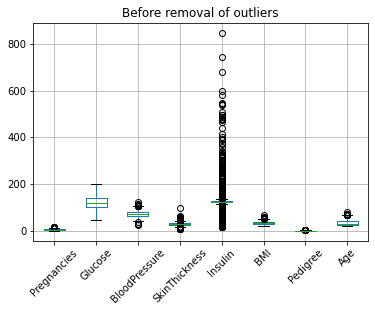

In [807]:
data_f.boxplot()
plt.title('Before removal of outliers')
plt.xticks(rotation=45) 
plt.show()

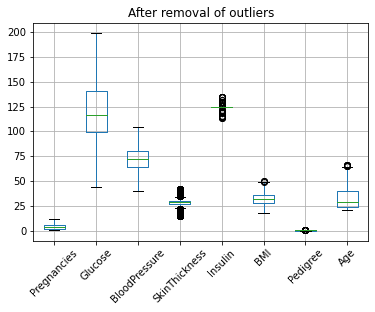

In [809]:
df.boxplot()
plt.title('After removal of outliers')
plt.xticks(rotation=45) 
plt.show()

>We note that replacing the detected outliers with the median reduces the number of outliers significantly as shown the preceding two graphs